CARGA DE ARCHIVO

In [ ]:
# Subir archivo desde Google Colab
from google.colab import files

def upload_file():
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    print(f"Archivo {filename} subido correctamente.")
    return filename

# Llamar a la función para subir el archivo
filename = upload_file()


Saving MODELO.xlsx to MODELO (1).xlsx
Archivo MODELO (1).xlsx subido correctamente.


HISTOGRAMAS DE LAS VARIABLES

Primeras filas del dataset:


,CM,KG,AGE,NFR,GK,DF,MF,AT,EAFC24R,CML,HMVT,SV,DL2324ATR,DL2324M,DL2324PR,EC2324WP,EC2324M,EC2324PR,MVT24
0,195,94,24,43,0,0,0,1,94,30,200.0,1190.0,89.97,2559,7.47,83.84,779,7.21,200.0
1,176,73,24,5,0,0,0,1,94,30,200.0,1230.0,86.94,1875,7.38,83.84,902,7.69,200.0
2,186,75,21,4,0,0,1,0,91,54,180.0,1230.0,86.94,2324,8.05,83.84,964,7.78,180.0
3,182,75,25,2,0,0,0,1,94,54,200.0,850.5,85.81,2159,7.93,83.84,1080,7.71,180.0
4,178,65,23,4,0,0,0,1,90,30,150.0,1150.0,89.97,2937,7.75,83.84,695,7.68,150.0


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    se

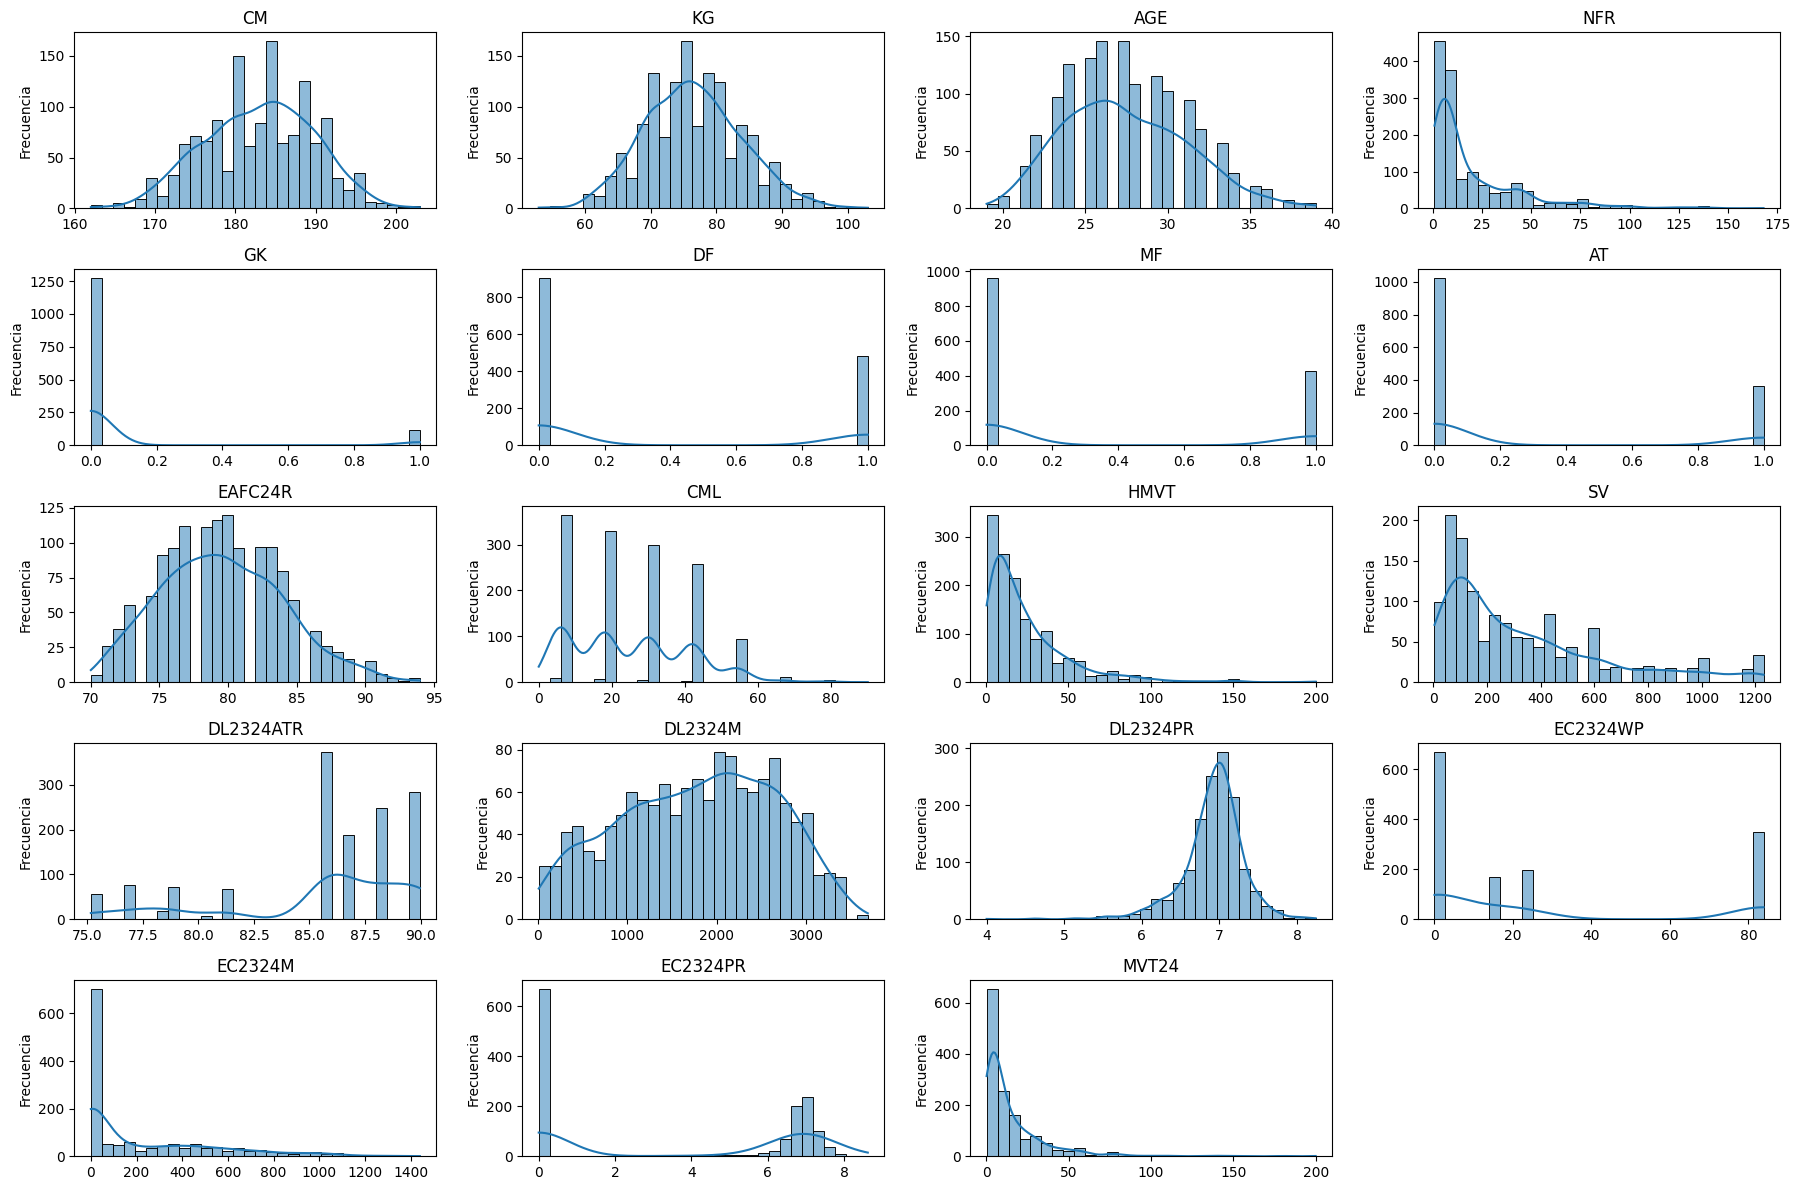

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
df = pd.read_excel(filename, sheet_name="Hoja2")  # Ajusta la hoja si es necesario

# Verificar que los datos están cargados correctamente
print("Primeras filas del dataset:")
display(df.head())

# Generar histogramas de todas las variables
plt.figure(figsize=(18, 12))  # Aumentamos el ancho para mejor visualización

# Número de variables en el dataset
num_columns = df.shape[1]

# Crear subgráficos para cada variable
for i, col in enumerate(df.columns):
    plt.subplot((num_columns // 4) + 1, 4, i + 1)  # Cambiamos de 3 a 4 por fila
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()



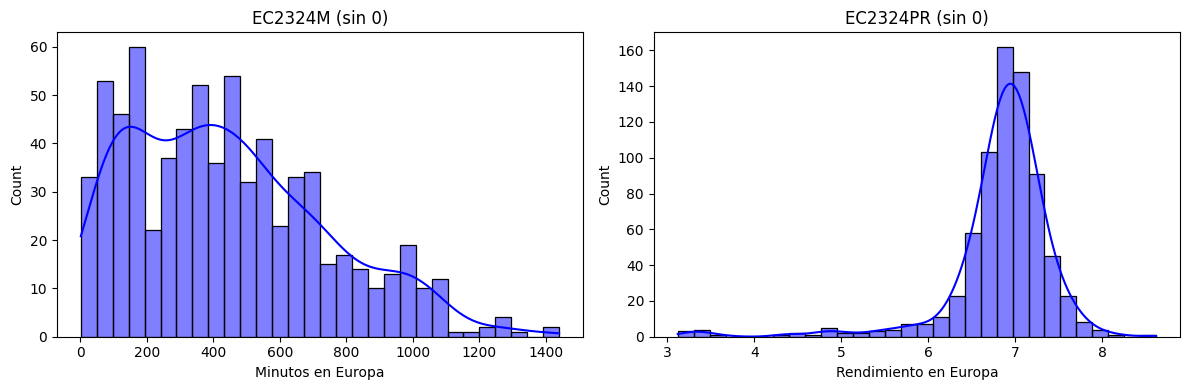

In [ ]:
# 📌 4. Crear una versión sin ceros en EC23-24M y EC23-24PR
df_filtered = df[(df["EC2324M"] > 0) & (df["EC2324PR"] > 0)]

# 📌 5. Visualizar histogramas antes de transformar
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_filtered["EC2324M"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("EC2324M (sin 0)")
axes[0].set_xlabel("Minutos en Europa")

sns.histplot(df_filtered["EC2324PR"], bins=30, kde=True, ax=axes[1], color="blue")
axes[1].set_title("EC2324PR (sin 0)")
axes[1].set_xlabel("Rendimiento en Europa")

plt.tight_layout()
plt.show()



TRANSFORMACIÓN LOGARÍTMICA DE VARIABLES CONSIDERADAS


In [ ]:
import numpy as np

# Lista de variables a transformar
variables_log = ["HMVT", "MVT24", "NFR", "EC2324M", "SV"]

# Aplicar transformación logarítmica y renombrar las columnas
for var in variables_log:
    if var in df.columns:
        df[f"{var}_log"] = np.log1p(df[var])  # log1p(x) = ln(1 + x)
        df.drop(columns=[var], inplace=True)  # Eliminar la variable original
    else:
        print(f"Advertencia: La variable {var} no se encuentra en el dataset.")

# Verificar los cambios en las variables transformadas
display(df[[f"{var}_log" for var in variables_log]].head())

# Guardar la base de datos actualizada en la sesión de Google Colab
file_path = "/content/MODELO_transformado.csv"
df.to_csv(file_path, index=False)

print(f"Transformación logarítmica aplicada y archivo guardado en: {file_path}")



,HMVT_log,MVT24_log,NFR_log,EC2324M_log,SV_log
0,5.303305,5.303305,3.784190,6.659294,7.082549
1,5.303305,5.303305,1.791759,6.805723,7.115582
2,5.198497,5.198497,1.609438,6.872128,7.115582
3,5.303305,5.198497,1.098612,6.985642,6.747000
4,5.017280,5.017280,1.609438,6.545350,7.048386


Transformación logarítmica aplicada y archivo guardado en: /content/MODELO_transformado.csv


HISTOGRAMAS CON VARIABLES TRANSFORMADAS


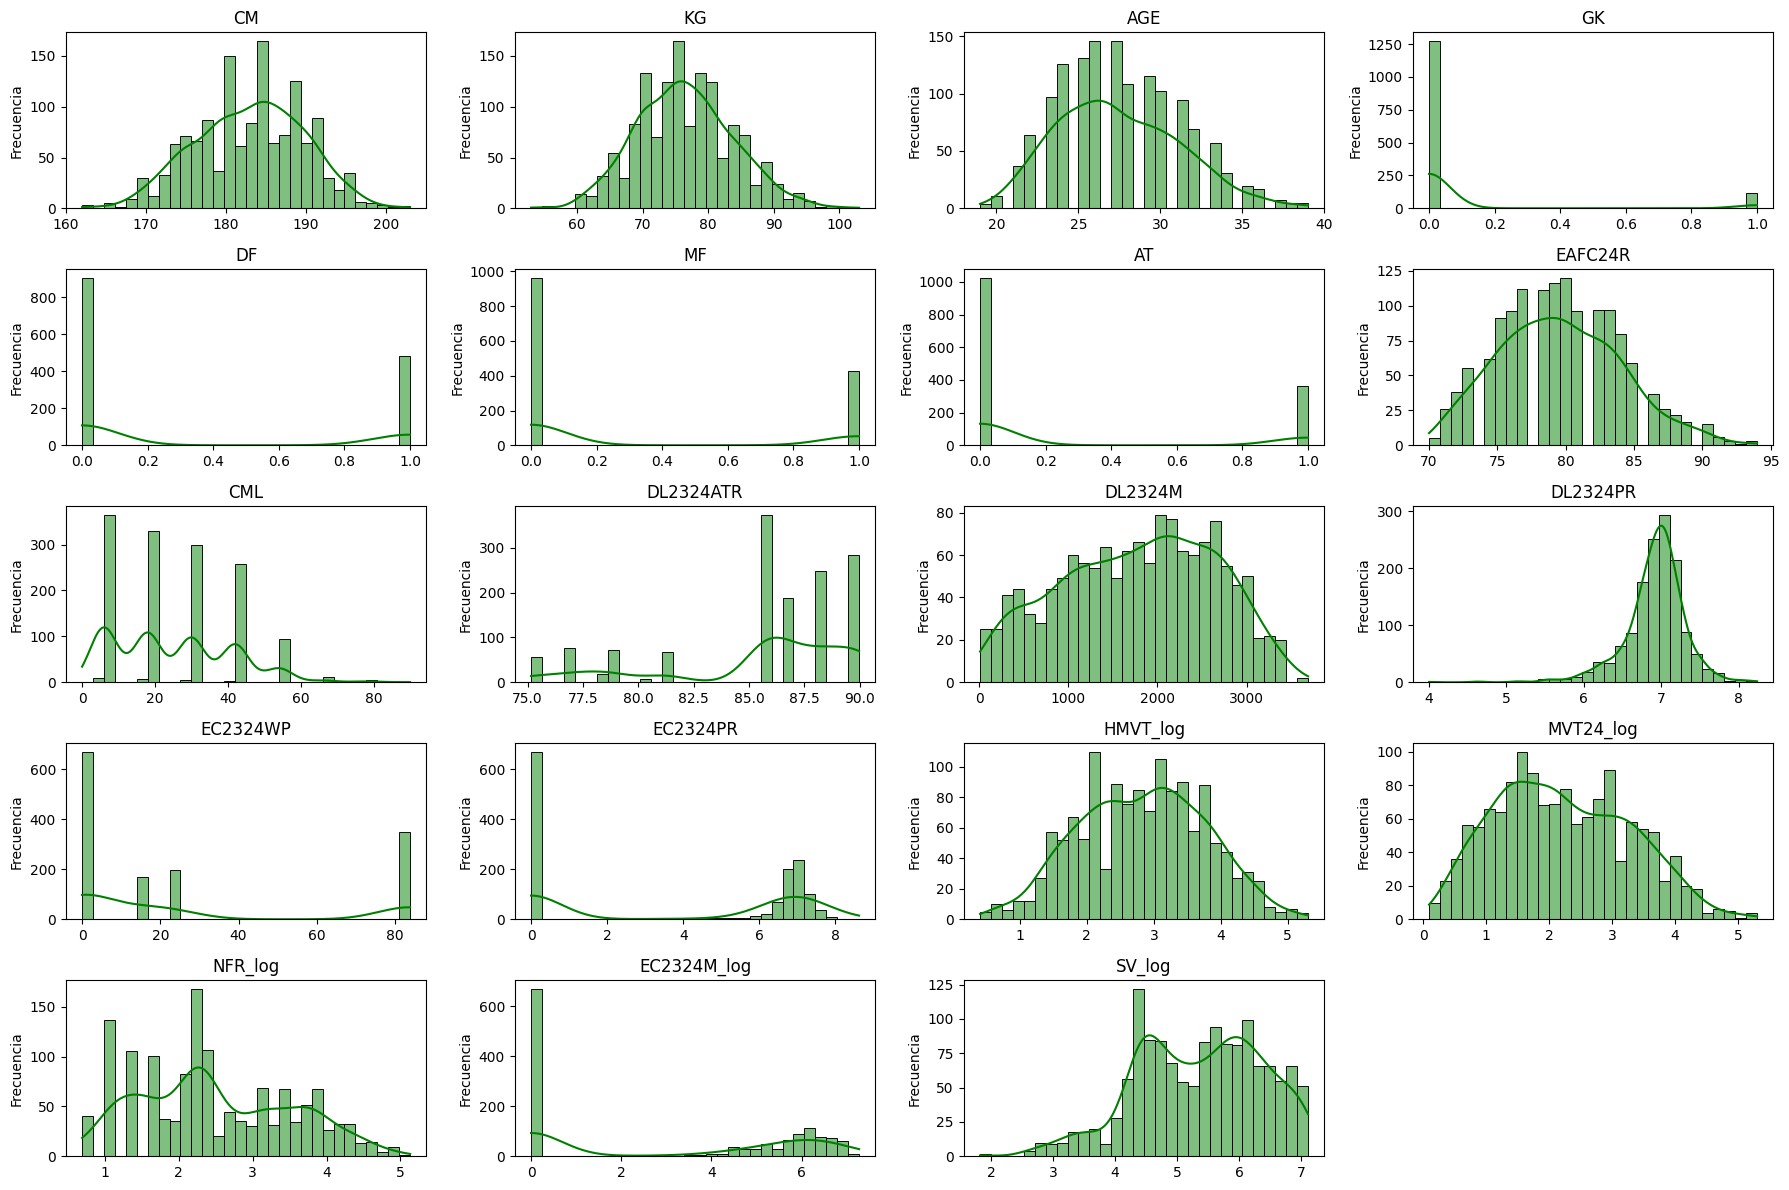

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la base de datos actualizada
df = pd.read_csv("/content/MODELO_transformado.csv")

# Configurar el tamaño del gráfico
plt.figure(figsize=(18, 12))

# Número de variables en el dataset
num_columns = df.shape[1]

# Crear subgráficos para cada variable con color verde
for i, col in enumerate(df.columns):
    plt.subplot((num_columns // 4) + 1, 4, i + 1)  # 4 histogramas por fila
    sns.histplot(df[col], bins=30, kde=True, color="green")  # Color verde
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()



REGRESIÓN LINEAL


Resumen del Modelo de Regresión Lineal:
                            OLS Regression Results                            
Dep. Variable:              MVT24_log   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     465.6
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:29:48   Log-Likelihood:                -473.07
No. Observations:                1112   AIC:                             982.1
Df Residuals:                    1094   BIC:                             1072.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

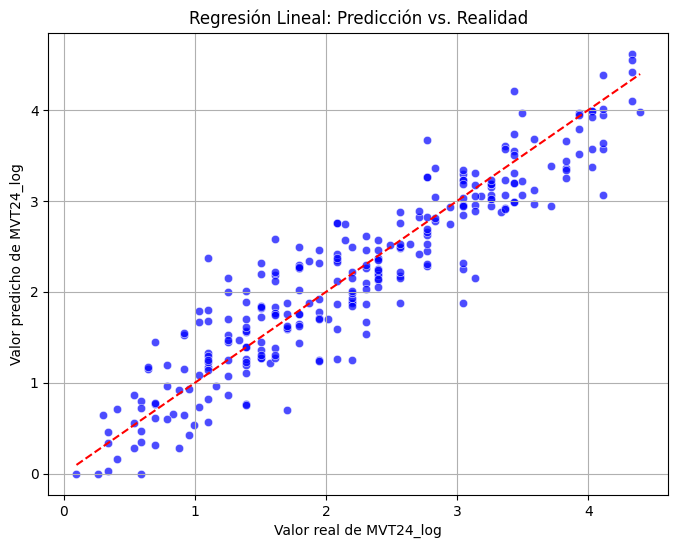

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar la base de datos transformada
file_path = "/content/MODELO_transformado.csv"
df = pd.read_csv(file_path)

# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["MVT24_log"])  # Eliminar la variable objetivo
y = df["MVT24_log"]

# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar constante para la regresión
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y_train, X_train_const).fit()

# Obtener coeficientes y significatividad de cada variable
print("Resumen del Modelo de Regresión Lineal:")
print(model.summary())

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_const)

# Evitar valores negativos antes de la retransformación
y_pred = np.maximum(y_pred, 0)
y_pred_original = np.exp(y_pred) - 1
y_test_original = np.exp(y_test) - 1

# Calcular métricas de evaluación en la escala original
r2 = r2_score(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)

print("\nMétricas del modelo en la escala original:")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:,.2f} (M€)")
print(f"MAE: {mae:,.2f} (M€)")

# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Línea de referencia ideal
plt.xlabel("Valor real de MVT24_log")
plt.ylabel("Valor predicho de MVT24_log")
plt.title("Regresión Lineal: Predicción vs. Realidad")
plt.grid(True)
plt.show()


REGRESIÓN LINEAL OPTIMIZADA (SÓLO VARIABLES SIGNIFICATIVAS POR BACKWARD ELIMINATION)


Variables significativas (p < 0.05): ['AGE', 'GK', 'DF', 'MF', 'AT', 'EAFC24R', 'CML', 'DL2324ATR', 'DL2324M', 'DL2324PR', 'EC2324WP', 'HMVT_log', 'SV_log']

Resumen del nuevo Modelo de Regresión Lineal con variables significativas:
                            OLS Regression Results                            
Dep. Variable:              MVT24_log   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     655.0
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:29:53   Log-Likelihood:                -478.70
No. Observations:                1112   AIC:                             983.4
Df Residuals:                    1099   BIC:                             1049.
Df Model:                          12                                         
Covariance Type:            nonrobust                  

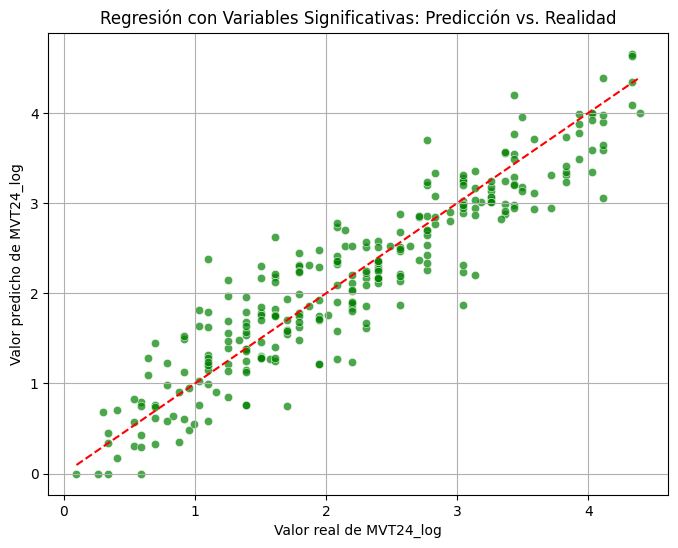

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🔹 Eliminar EC23-24M y EC23-24PR del dataset antes de la regresión
X_train_const = X_train_const.drop(columns=["EC2324M_log", "EC2324PR"], errors="ignore")
X_test_const = X_test_const.drop(columns=["EC2324M_log", "EC2324PR"], errors="ignore")

# Obtener los p-valores del modelo
p_values = model.pvalues

# Filtrar variables significativas (p < 0.05)
significant_vars = p_values[p_values < 0.05].index.tolist()

# 🔹 Eliminar la constante si está en la lista
if 'const' in significant_vars:
    significant_vars.remove('const')

# 🔹 Asegurar que EC23-24M y EC23-24PR NO estén en la lista de variables significativas
significant_vars = [var for var in significant_vars if var not in ["EC2324M_log", "EC2324PR"]]

print("\nVariables significativas (p < 0.05):", significant_vars)

# 🔹 Nueva regresión con solo las variables significativas (sin EC23-24M ni EC23-24PR)
X_train_signif = X_train_const[significant_vars]  # Seleccionar solo las variables significativas
X_test_signif = X_test_const[significant_vars]
X_train_signif = sm.add_constant(X_train_signif)
X_test_signif = sm.add_constant(X_test_signif)

# Ajustar el nuevo modelo de regresión lineal
model_signif = sm.OLS(y_train, X_train_signif).fit()

# Mostrar resumen del nuevo modelo
print("\nResumen del nuevo Modelo de Regresión Lineal con variables significativas:")
print(model_signif.summary())

# Predecir con el nuevo modelo
y_pred_signif = model_signif.predict(X_test_signif)

# **🔹 Evitar valores negativos antes de la retransformación**
y_pred_signif = np.maximum(y_pred_signif, 0)

# **🔹 Retransformar a la escala original (Millones de €)**
y_pred_signif_original = np.exp(y_pred_signif) - 1
y_test_original = np.exp(y_test) - 1

# **🔹 Calcular métricas en la escala original**
r2_signif = r2_score(y_test_original, y_pred_signif_original)
rmse_signif = np.sqrt(mean_squared_error(y_test_original, y_pred_signif_original))
mae_signif = mean_absolute_error(y_test_original, y_pred_signif_original)

print("\nMétricas del nuevo modelo en la escala original:")
print(f"R²: {r2_signif:.4f}")
print(f"RMSE: {rmse_signif:,.2f} (M€)")
print(f"MAE: {mae_signif:,.2f} (M€)")

# 🔹 Gráfico de dispersión para el nuevo modelo
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_signif, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valor real de MVT24_log")
plt.ylabel("Valor predicho de MVT24_log")
plt.title("Regresión con Variables Significativas: Predicción vs. Realidad")
plt.grid(True)
plt.show()



ANÁLISIS DE RESIDUOS

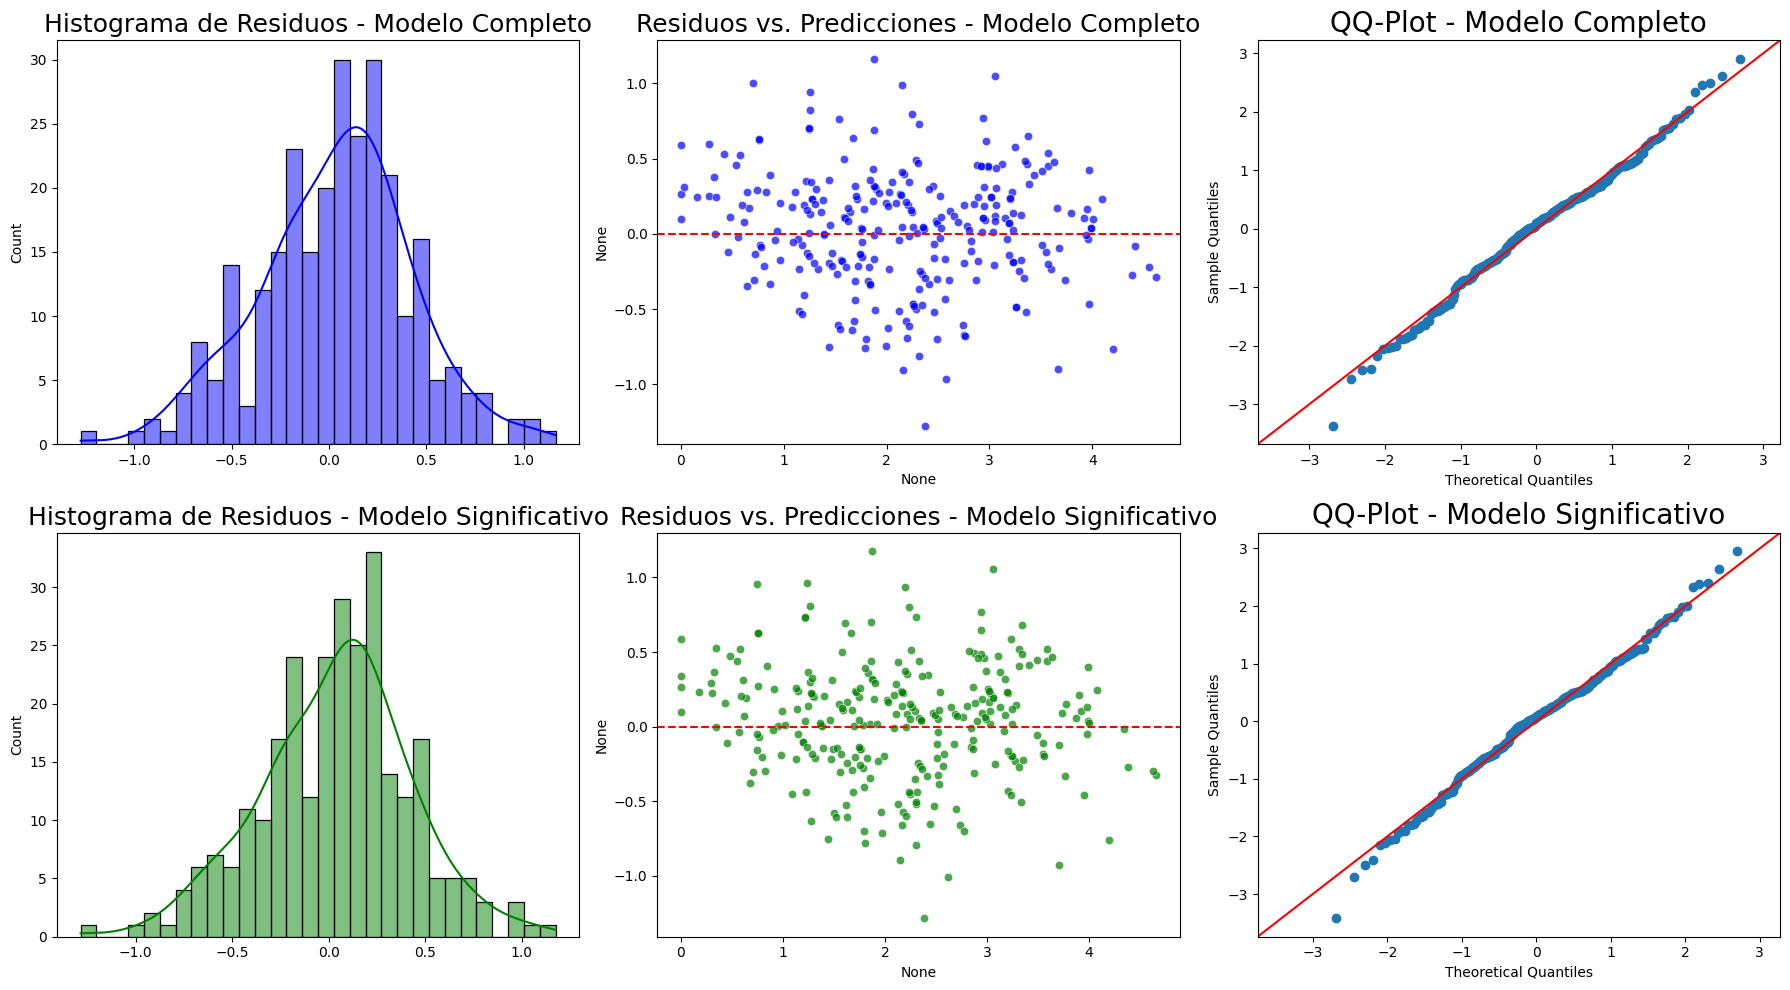

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los residuos del modelo completo
residuals = y_test - y_pred

# Calcular los residuos del modelo con variables significativas
residuals_signif = y_test - y_pred_signif

# Crear gráficos de análisis de residuos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histograma de residuos - Modelo completo
sns.histplot(residuals, bins=30, kde=True, color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Histograma de Residuos - Modelo Completo", fontsize=18)

# Histograma de residuos - Modelo con variables significativas
sns.histplot(residuals_signif, bins=30, kde=True, color="green", ax=axes[1, 0])
axes[1, 0].set_title("Histograma de Residuos - Modelo Significativo", fontsize=18)

# Residuos vs. valores predichos - Modelo completo
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color="blue", ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='red', linestyle="--")
axes[0, 1].set_title("Residuos vs. Predicciones - Modelo Completo", fontsize=18)

# Residuos vs. valores predichos - Modelo con variables significativas
sns.scatterplot(x=y_pred_signif, y=residuals_signif, alpha=0.7, color="green", ax=axes[1, 1])
axes[1, 1].axhline(y=0, color='red', linestyle="--")
axes[1, 1].set_title("Residuos vs. Predicciones - Modelo Significativo", fontsize=18)

# QQ-Plot - Modelo completo
sm.qqplot(residuals, line="45", fit=True, ax=axes[0, 2])
axes[0, 2].set_title("QQ-Plot - Modelo Completo", fontsize=20)

# QQ-Plot - Modelo con variables significativas
sm.qqplot(residuals_signif, line="45", fit=True, ax=axes[1, 2])
axes[1, 2].set_title("QQ-Plot - Modelo Significativo", fontsize=20)

plt.tight_layout()
plt.show()



RANDOM FOREST


Métricas del modelo Random Forest en la escala original:
R²: 0.8430
RMSE: 6.58 (M€)
MAE: 3.63 (M€)


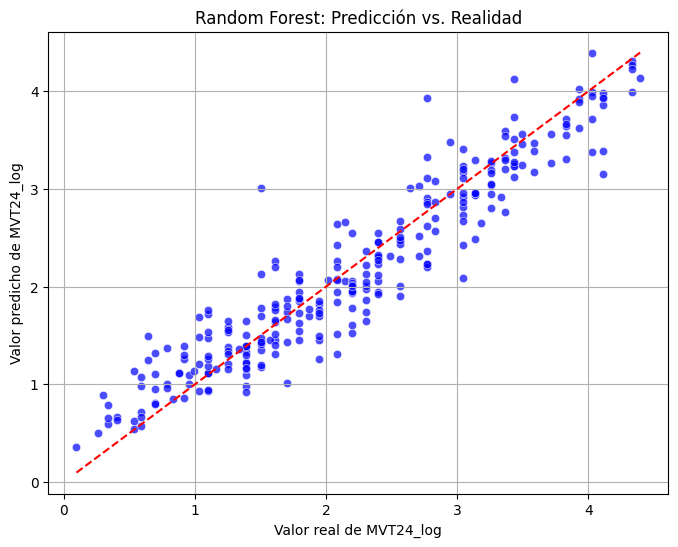

<ipython-input-37-06d6d2f7fd4e>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")


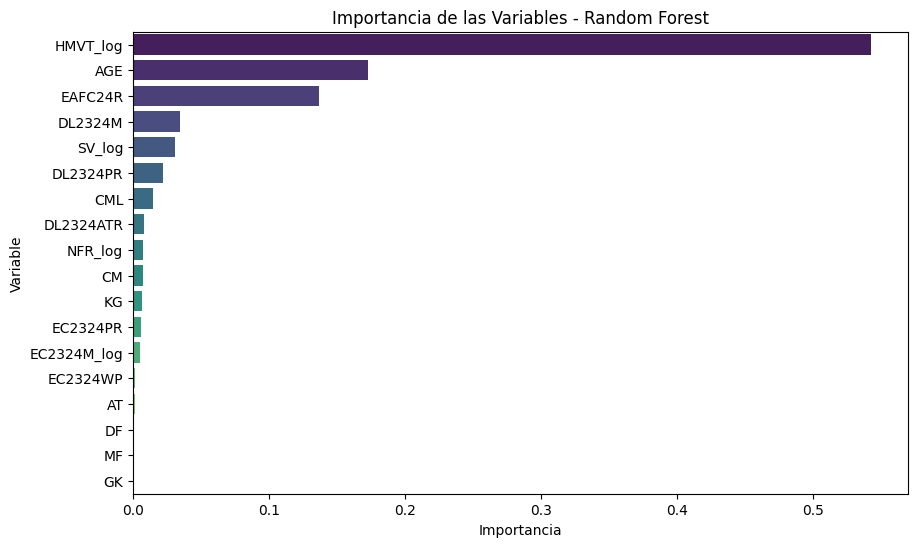

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# **🔹 Evitar valores negativos antes de la retransformación**
y_pred_rf = np.maximum(y_pred_rf, 0)

# **🔹 Retransformar a la escala original (Millones de €)**
y_pred_rf_original = np.exp(y_pred_rf) - 1
y_test_original = np.exp(y_test) - 1

# **🔹 Calcular métricas en la escala original**
r2_rf = r2_score(y_test_original, y_pred_rf_original)
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original))
mae_rf = mean_absolute_error(y_test_original, y_pred_rf_original)

print("\nMétricas del modelo Random Forest en la escala original:")
print(f"R²: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:,.2f} (M€)")
print(f"MAE: {mae_rf:,.2f} (M€)")

# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valor real de MVT24_log")
plt.ylabel("Valor predicho de MVT24_log")
plt.title("Random Forest: Predicción vs. Realidad")
plt.grid(True)
plt.show()

# Importancia de las variables
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({"Variable": X_train.columns, "Importancia": importances})
feature_importance = feature_importance.sort_values(by="Importancia", ascending=False)

# Mostrar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")
plt.title("Importancia de las Variables - Random Forest")
plt.show()


RANDOM FOREST OPTIMIZADO (GRIDSEARCH)

Fitting 3 folds for each of 162 candidates, totalling 486 fits

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Métricas del modelo optimizado en la escala original:
R²: 0.8371
RMSE: 6.71 (M€)
MAE: 3.87 (M€)


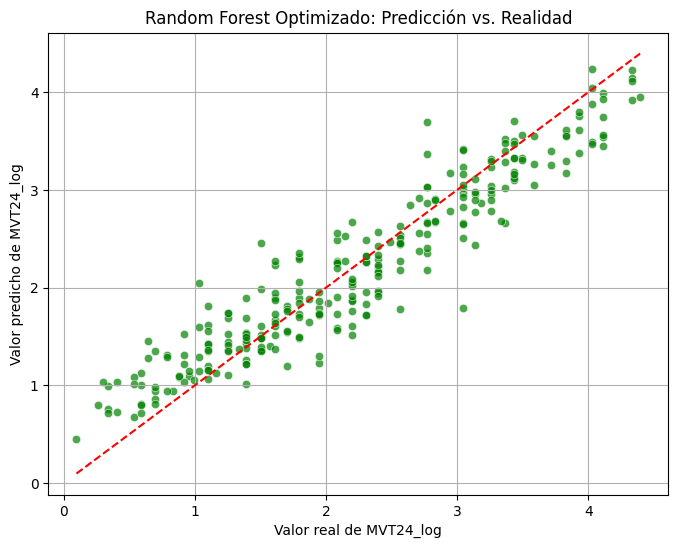

<ipython-input-38-394736b5ccd3>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")


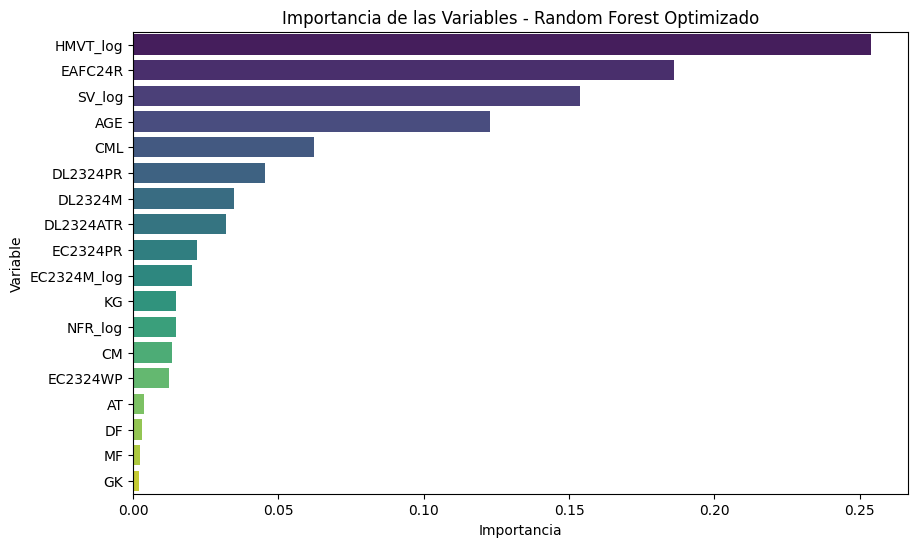

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir el modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir la rejilla de hiperparámetros a probar
param_grid = {
    "n_estimators": [100, 200, 300],       # Número de árboles
    "max_depth": [10, 20, None],           # Profundidad máxima
    "min_samples_split": [2, 5, 10],       # Min muestras para dividir nodo
    "min_samples_leaf": [1, 2, 4],         # Min muestras en cada hoja
    "max_features": ["sqrt", "log2"]       # Cantidad de features usadas por cada árbol
}

# Definir búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1, verbose=2)

# Ejecutar búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener mejores hiperparámetros
best_params = grid_search.best_params_
print("\nMejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores parámetros encontrados
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_best_rf = best_rf.predict(X_test)

# **🔹 Evitar valores negativos antes de la retransformación**
y_pred_best_rf = np.maximum(y_pred_best_rf, 0)

# **🔹 Retransformar a la escala original (Millones de €)**
y_pred_best_rf_original = np.exp(y_pred_best_rf) - 1
y_test_original = np.exp(y_test) - 1

# **🔹 Calcular métricas en la escala original**
r2_best_rf = r2_score(y_test_original, y_pred_best_rf_original)
rmse_best_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_best_rf_original))
mae_best_rf = mean_absolute_error(y_test_original, y_pred_best_rf_original)

print("\nMétricas del modelo optimizado en la escala original:")
print(f"R²: {r2_best_rf:.4f}")
print(f"RMSE: {rmse_best_rf:,.2f} (M€)")
print(f"MAE: {mae_best_rf:,.2f} (M€)")

# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valor real de MVT24_log")
plt.ylabel("Valor predicho de MVT24_log")
plt.title("Random Forest Optimizado: Predicción vs. Realidad")
plt.grid(True)
plt.show()

# Importancia de las variables
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({"Variable": X_train.columns, "Importancia": importances})
feature_importance = feature_importance.sort_values(by="Importancia", ascending=False)

# Gráfico de importancia de variables
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Variable", data=feature_importance, palette="viridis")
plt.title("Importancia de las Variables - Random Forest Optimizado")
plt.show()


ANÁLISIS DE RESIDUOS

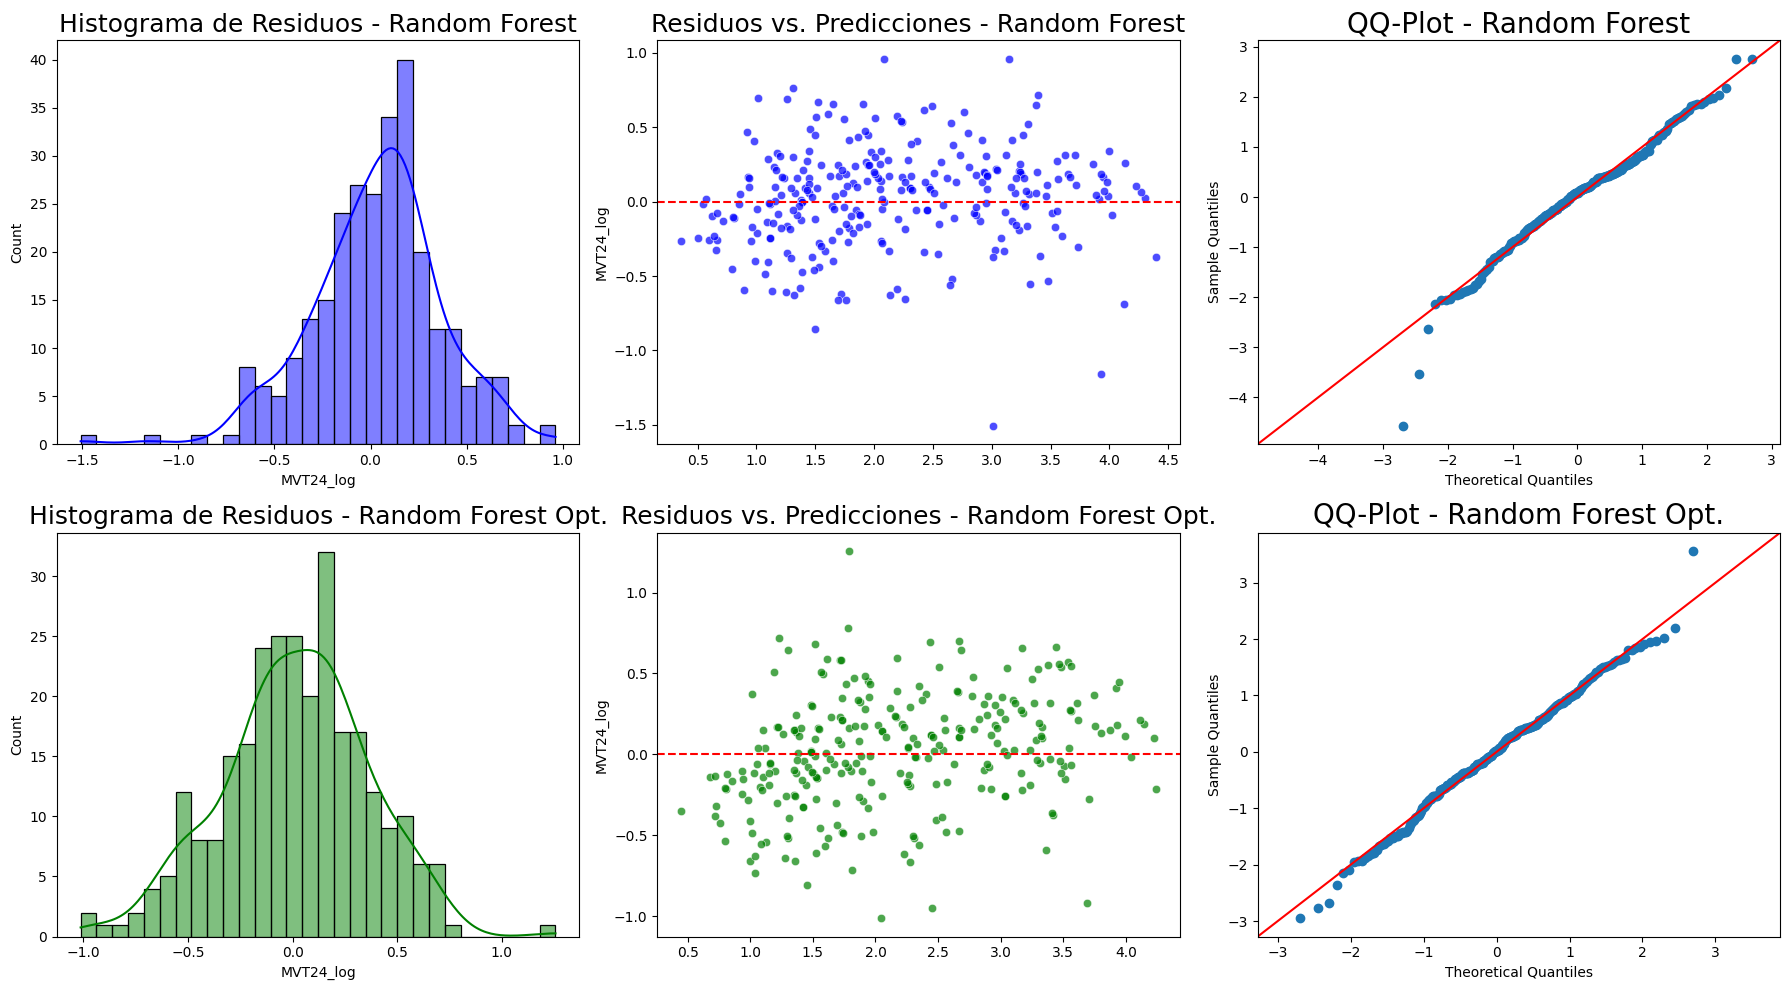

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Calcular los residuos de ambos modelos sin destransformación
residuals_rf = y_test - y_pred_rf  # Random Forest estándar
residuals_best_rf = y_test - y_pred_best_rf  # Random Forest optimizado

# Crear gráficos de análisis de residuos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histograma de residuos - Random Forest estándar
sns.histplot(residuals_rf, bins=30, kde=True, color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Histograma de Residuos - Random Forest", fontsize=18)

# Histograma de residuos - Random Forest Optimizado
sns.histplot(residuals_best_rf, bins=30, kde=True, color="green", ax=axes[1, 0])
axes[1, 0].set_title("Histograma de Residuos - Random Forest Opt.", fontsize=18)

# Residuos vs. valores predichos - Random Forest estándar
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.7, color="blue", ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='red', linestyle="--")
axes[0, 1].set_title("Residuos vs. Predicciones - Random Forest", fontsize=18)

# Residuos vs. valores predichos - Random Forest Optimizado
sns.scatterplot(x=y_pred_best_rf, y=residuals_best_rf, alpha=0.7, color="green", ax=axes[1, 1])
axes[1, 1].axhline(y=0, color='red', linestyle="--")
axes[1, 1].set_title("Residuos vs. Predicciones - Random Forest Opt.", fontsize=18)

# QQ-Plot - Random Forest estándar
sm.qqplot(residuals_rf, line="45", fit=True, ax=axes[0, 2])
axes[0, 2].set_title("QQ-Plot - Random Forest", fontsize=20)

# QQ-Plot - Random Forest Optimizado
sm.qqplot(residuals_best_rf, line="45", fit=True, ax=axes[1, 2])
axes[1, 2].set_title("QQ-Plot - Random Forest Opt.", fontsize=20)

plt.tight_layout()
plt.show()



TABLA COMPARATIVA DE LOS 4 MODELOS

In [ ]:
import pandas as pd

# Crear un DataFrame con las métricas de los cuatro modelos trabajados
comparacion_modelos = pd.DataFrame({
    "Modelo": [
        "Regresión Lineal Completa",
        "Regresión Lineal Significativa",
        "Random Forest",
        "Random Forest Optimizado"
    ],
    "R²": [r2, r2_signif, r2_rf, r2_best_rf],
    "RMSE": [rmse, rmse_signif, rmse_rf, rmse_best_rf],
    "MAE": [mae, mae_signif, mae_rf, mae_best_rf]
})

# Ajustar el índice para que empiece desde 1
comparacion_modelos.index = range(1, len(comparacion_modelos) + 1)

# Mostrar la tabla
from IPython.display import display
display(comparacion_modelos)





,Modelo,R²,RMSE,MAE
1,Regresión Lineal Completa,0.800714,7.417193,4.292774
2,Regresión Lineal Significativa,0.791743,7.582308,4.331901
3,Random Forest,0.842962,6.584212,3.625942
4,Random Forest Optimizado,0.837142,6.705098,3.874386


CREACIÓN DE NUEVAS COLUMNAS (DIFFERENCE IN M€, DIFFERENCE IN %, PREDICTION)

In [ ]:
# 🔹 Crear nueva columna con MVT24 en la escala original sin eliminar MVT24_log
if "MVT24" not in df.columns or df["MVT24"].max() < 20:
    df["MVT24"] = np.exp(df["MVT24_log"]) - 1

# 🔹 Asegurar que usamos las mismas variables que en el entrenamiento
X_all = df[X.columns]  # Solo seleccionamos las columnas que estaban en el entrenamiento

# 🔹 Hacer predicciones asegurando que no incluimos la variable objetivo
df["PRED"] = np.exp(best_rf.predict(X_all)) - 1  # Sustitución de best_xgb por best_rf

# 🔹 Calcular la diferencia absoluta (€) y porcentual (%) con Transfermarkt
df["DIFF_M€"] = df["MVT24"] - df["PRED"]
df["DIFF_%"] = (df["DIFF_M€"] / df["MVT24"]) * 100

# 🔹 Guardar el DataFrame actualizado para futuros análisis
df.to_csv("datos_con_predicciones.csv", index=False)

# 🔹 Mostrar los primeros registros para verificar
print(df[["MVT24_log", "MVT24", "PRED", "DIFF_M€", "DIFF_%"]].head())




   MVT24_log  MVT24        PRED    DIFF_M€     DIFF_%
0   5.303305  200.0  154.738432  45.261568  22.630784
1   5.303305  200.0  165.613973  34.386027  17.193014
2   5.198497  180.0  160.251534  19.748466  10.971370
3   5.198497  180.0  156.331631  23.668369  13.149094
4   5.017280  150.0  138.961680  11.038320   7.358880


CÁLCULO DE UMBRALES BASADOS EN VARIANZA

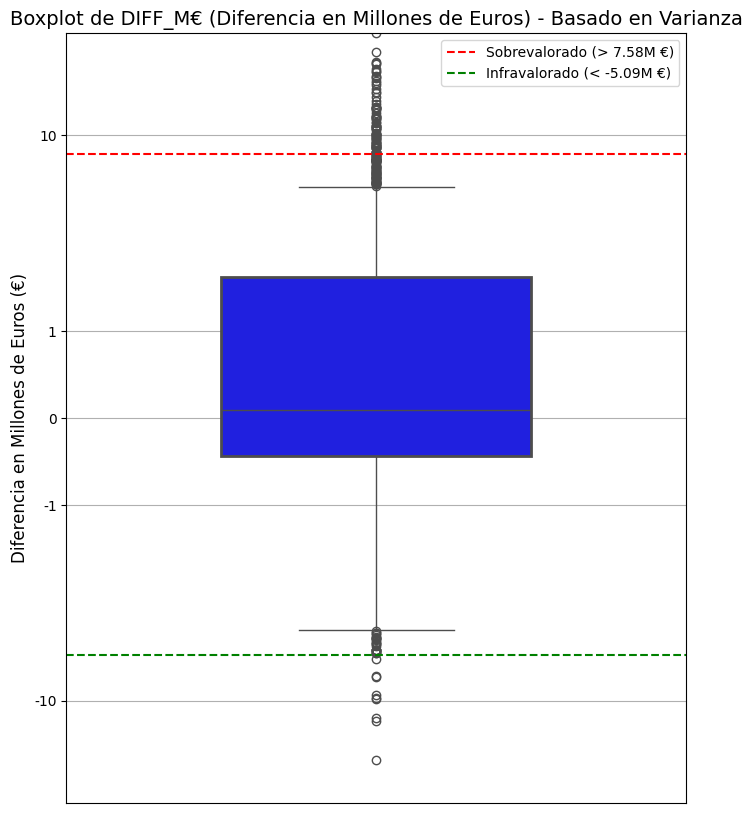

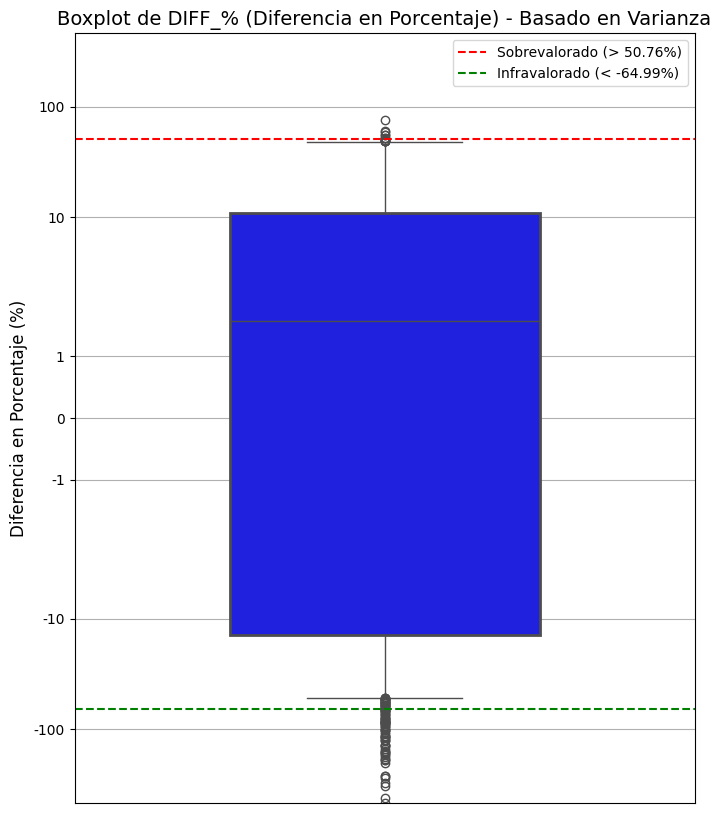

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Cálculo de umbrales basados en la varianza (desviación estándar)


# Función para calcular los límites usando la media y la desviación estándar
def calcular_umbral_varianza(series, factor=1.5):
    media = np.mean(series)
    std = np.std(series)
    limite_inferior = media - factor * std
    limite_superior = media + factor * std
    return limite_inferior, limite_superior

# Calcular límites para DIFF_M€ y DIFF_% usando varianza
lim_inf_m, lim_sup_m = calcular_umbral_varianza(df["DIFF_M€"])
lim_inf_p, lim_sup_p = calcular_umbral_varianza(df["DIFF_%"])


# Cálculo de límites simétricos en escala logarítmica


def calcular_limites_simetricos(series):
    """
    Define límites simétricos para el eje Y, asegurando que la distancia desde 0 a los valores máximos
    positivos y negativos sea igual. Se usa escala logarítmica simétrica para mejor visualización.
    """
    max_abs = max(abs(series.min()), abs(series.max()))  # Tomamos el valor absoluto más alto
    return -max_abs, max_abs

# Obtener límites simétricos para DIFF_M€ y DIFF_%
ymin_m, ymax_m = calcular_limites_simetricos(df["DIFF_M€"])
ymin_p, ymax_p = calcular_limites_simetricos(df["DIFF_%"])


# Función para configurar etiquetas del eje Y sin transformación logarítmica


def formato_eje_y(ax):
    """
    Modifica las etiquetas del eje Y para que se muestren en escala normal,
    aunque el fondo del gráfico use escala logarítmica simétrica.
    """
    def etiqueta_valor(x, pos):
        return f"{x:.0f}"  # Muestra valores enteros sin formato logarítmico

    ax.yaxis.set_major_formatter(mticker.FuncFormatter(etiqueta_valor))


#  Visualización con Boxplots (Escala Logarítmica pero Etiquetas Normales)


fig, ax = plt.subplots(figsize=(8, 10))
sns.boxplot(y=df["DIFF_M€"], color="blue", width=0.5, boxprops=dict(linewidth=2), ax=ax)

# Líneas de umbral basadas en varianza
ax.axhline(lim_sup_m, color='red', linestyle='--', label=f'Sobrevalorado (> {lim_sup_m:.2f}M €)')
ax.axhline(lim_inf_m, color='green', linestyle='--', label=f'Infravalorado (< {lim_inf_m:.2f}M €)')

# Aplicar escala logarítmica simétrica pero mantener etiquetas normales
ax.set_yscale("symlog")
ax.set_ylim(ymin_m, ymax_m)
formato_eje_y(ax)

ax.set_title("Boxplot de DIFF_M€ (Diferencia en Millones de Euros) - Basado en Varianza", fontsize=14)
ax.set_ylabel("Diferencia en Millones de Euros (€)", fontsize=12)
ax.set_xticks([])  # Ocultar eje X
ax.legend()
ax.grid()
plt.show()


fig, ax = plt.subplots(figsize=(8, 10))
sns.boxplot(y=df["DIFF_%"], color="blue", width=0.5, boxprops=dict(linewidth=2), ax=ax)

# Líneas de umbral basadas en varianza
ax.axhline(lim_sup_p, color='red', linestyle='--', label=f'Sobrevalorado (> {lim_sup_p:.2f}%)')
ax.axhline(lim_inf_p, color='green', linestyle='--', label=f'Infravalorado (< {lim_inf_p:.2f}%)')

# Aplicar escala logarítmica simétrica pero mantener etiquetas normales
ax.set_yscale("symlog")
ax.set_ylim(ymin_p, ymax_p)
formato_eje_y(ax)

ax.set_title("Boxplot de DIFF_% (Diferencia en Porcentaje) - Basado en Varianza", fontsize=14)
ax.set_ylabel("Diferencia en Porcentaje (%)", fontsize=12)
ax.set_xticks([])  # Ocultar eje X
ax.legend()
ax.grid()
plt.show()

EJEMPLO DE PREDICCIÓN

In [ ]:
import numpy as np
import pandas as pd

# =====================================================
# 🔹 Umbrales por varianza (1.5 desviaciones estándar)
# =====================================================
def calcular_umbral_varianza(series, factor=1.5):
    media = np.mean(series)
    std = np.std(series)
    limite_inferior = media - factor * std
    limite_superior = media + factor * std
    return limite_inferior, limite_superior

lim_inf_m, lim_sup_m = calcular_umbral_varianza(df["DIFF_M€"])
lim_inf_p, lim_sup_p = calcular_umbral_varianza(df["DIFF_%"])

# =====================================================
# 🔹 Función principal
# =====================================================
def evaluar_jugador(datos_entrada, valor_actual, club_grande, en_plantilla):
    for key in ["HMVT_log", "NFR_log", "EC2324M_log", "SV_log"]:
        if key in datos_entrada:
            datos_entrada[key] = np.log(datos_entrada[key] + 1)

    df_input = pd.DataFrame([datos_entrada])
    df_input = df_input.reindex(columns=X_train.columns, fill_value=0)

    valor_predicho = np.exp(best_rf.predict(df_input)[0]) - 1
    diff_millones = valor_actual - valor_predicho
    diff_porcentaje = (diff_millones / valor_actual) * 100

    clasificacion_m = "Sobrevalorado" if diff_millones > lim_sup_m else "Infravalorado" if diff_millones < lim_inf_m else "Correctamente Valorado"
    clasificacion_p = "Sobrevalorado" if diff_porcentaje > lim_sup_p else "Infravalorado" if diff_porcentaje < lim_inf_p else "Correctamente Valorado"

    clasificacion = clasificacion_m if club_grande == 1 else clasificacion_p

    if en_plantilla == 1:
        if clasificacion == "Sobrevalorado":
            recomendacion = "Vender Jugador"
        elif clasificacion == "Infravalorado":
            recomendacion = "Mejorar Condiciones de Contrato y Retener al Jugador"
        else:
            recomendacion = "Mantener Sin Cambios"
    else:
        if clasificacion == "Infravalorado":
            recomendacion = "Fichar Jugador"
        else:
            recomendacion = "Nada"

    # 🔸 Salida condicional según tipo de club
    resultado = {
        "Valor Predicho (M€)": round(valor_predicho, 2),
        "Valor Actual (M€)": round(valor_actual, 2),
        "Clasificación": clasificacion,
        "Recomendación": recomendacion
    }

    if club_grande == 1:
        resultado["Diferencia (M€)"] = round(diff_millones, 2)
    else:
        resultado["Diferencia (%)"] = round(diff_porcentaje, 2)

    return resultado

# =====================================================
# 🔹 Inputs del usuario
# =====================================================
print("\n🔹 Introduce las características del jugador:")

datos_input = {
    "CM": float(input("📏 Altura del jugador (CM): ")),
    "KG": float(input("⚖️ Peso del jugador (KG): ")),
    "AGE": float(input("🎂 Edad del jugador: ")),
    "NFR_log": float(input("🌍 Ranking FIFA de la nacionalidad: ")),
    "GK": int(input("🧤 ¿Es portero? (1: Sí, 0: No): ")),
    "DF": int(input("🛡️ ¿Es defensa? (1: Sí, 0: No): ")),
    "MF": int(input("🎩 ¿Es mediocampista? (1: Sí, 0: No): ")),
    "AT": int(input("⚽ ¿Es delantero? (1: Sí, 0: No): ")),
    "EAFC24R": float(input("🎮 Valoración Potencial en EAFC24: ")),
    "CML": float(input("📅 Meses restantes de contrato: ")),
    "SV_log": float(input("🏟️ Valor de plantilla (M€): ")),
    "DL2324ATR": float(input("🏆 Nivel de competitividad de la liga doméstica: ")),
    "DL2324M": float(input("⏳ Minutos jugados en liga: ")),
    "DL2324PR": float(input("📊 Rendimiento en liga: ")),
    "EC2324WP": float(input("💰 Premio por competiciones europeas (M€): ")),
    "EC2324PR": float(input("🎖️ Rendimiento en competiciones europeas: ")),
    "EC2324M_log": float(input("⏳ Minutos jugados en competiciones europeas: ")),
    "HMVT_log": float(input("📈 Valor de mercado más alto en su carrera (M€): ")),
}

valor_actual = float(input("💶 Valor actual del jugador en M€: "))
club_grande = int(input("🏟️ Tipo de club (1: Grande / 0: Modesto): "))
en_plantilla = int(input("👕 ¿Está en tu plantilla? (1: Sí / 0: No): "))

# Evaluar jugador
evaluacion = evaluar_jugador(datos_input, valor_actual, club_grande, en_plantilla)

# Mostrar resultado
print("\n📊 RESULTADOS DE LA EVALUACIÓN DEL JUGADOR")
for clave, valor in evaluacion.items():
    print(f"{clave}: {valor}")



🔹 Introduce las características del jugador para obtener la predicción.
📏 Altura del jugador (CM): 178
⚖️ Peso del jugador (KG): 67
🎂 Edad del jugador: 27
🌍 Ranking FIFA de la nacionalidad: 2
🧤 ¿Es portero? (1: Sí, 0: No): 0
🛡️ ¿Es defensa? (1: Sí, 0: No): 0
🎩 ¿Es mediocampista? (1: Sí, 0: No): 0
⚽ ¿Es delantero? (1: Sí, 0: No): 1
🎮 Valoración Potencial en EAFC24: 86
📅 Meses restantes de contrato: 40
🏟️ Valor de plantilla (M€): 870
🏆 Nivel de competitividad de la liga doméstica: 85
⏳ Minutos jugados en liga: 1478
📊 Rendimiento en liga: 7.9
💰 Premio por competiciones europeas (M€): 84
🎖️ Rendimiento en competiciones europeas: 7.6
⏳ Minutos jugados en competiciones europeas: 802
📈 Valor de mercado más alto en su carrera (M€): 120
💶 Valor actual del jugador en M€: 55

📊 RESULTADOS DE LA EVALUACIÓN DEL JUGADOR
Valor Predicho (M€): 63.28
Valor Actual (M€): 55.0
Diferencia (M€): -8.28
Diferencia (%): -15.05
Clasificación por € (Clubes Grandes): Infravalorado
Clasificación por % (Clubes Pequ

(Pruebas API)


In [ ]:
import joblib

# Guardar el modelo entrenado
joblib.dump(best_rf, "modelo_rf.pkl")

# Guardar las columnas usadas en X_train para asegurar el orden
joblib.dump(X_train.columns.tolist(), "xtrain_cols.pkl")

# Guardar los umbrales de clasificación por varianza
# (Reemplaza por los tuyos si los calculas dinámicamente)
lim_inf_m, lim_sup_m = -5.09, 7.58
lim_inf_p, lim_sup_p = -64.99, 50.76

joblib.dump((lim_inf_m, lim_sup_m), "umbrales_millones.pkl")
joblib.dump((lim_inf_p, lim_sup_p), "umbrales_porcentaje.pkl")


['umbrales_porcentaje.pkl']

In [ ]:
import joblib

joblib.dump(best_rf, "modelo_rf.pkl")
joblib.dump(X_train.columns.tolist(), "xtrain_cols.pkl")
joblib.dump((lim_inf_m, lim_sup_m), "umbrales_millones.pkl")
joblib.dump((lim_inf_p, lim_sup_p), "umbrales_porcentaje.pkl")


['umbrales_porcentaje.pkl']

In [ ]:
from google.colab import files
files.download("modelo_rf.pkl")
files.download("xtrain_cols.pkl")
files.download("umbrales_millones.pkl")
files.download("umbrales_porcentaje.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install fastapi uvicorn nest_asyncio pyngrok joblib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import numpy as np
import joblib

# Habilitar entorno asíncrono
nest_asyncio.apply()

# Cargar modelo y configuraciones
modelo = joblib.load("modelo_rf.pkl")
columnas = joblib.load("xtrain_cols.pkl")
lim_inf_m, lim_sup_m = joblib.load("umbrales_millones.pkl")
lim_inf_p, lim_sup_p = joblib.load("umbrales_porcentaje.pkl")

# Inicializar app FastAPI
app = FastAPI()

# Definir estructura de entrada
class JugadorInput(BaseModel):
    CM: float
    KG: float
    AGE: float
    NFR_log: float
    GK: int
    DF: int
    MF: int
    AT: int
    EAFC24R: float
    CML: float
    SV_log: float
    DL2324ATR: float
    DL2324M: float
    DL2324PR: float
    EC2324WP: float
    EC2324PR: float
    EC2324M_log: float
    HMVT_log: float
    valor_actual: float

# Ruta de evaluación
@app.post("/evaluar/")
def evaluar(jugador: JugadorInput):
    data = jugador.dict()
    valor_real = data.pop("valor_actual")

    # Log transformaciones (por seguridad)
    for key in ["HMVT_log", "NFR_log", "EC2324M_log", "SV_log"]:
        if key in data:
            data[key] = np.log(data[key] + 1)

    df_input = pd.DataFrame([data])
    df_input = df_input.reindex(columns=columnas, fill_value=0)

    predicho_log = modelo.predict(df_input)[0]
    valor_predicho = np.exp(predicho_log) - 1

    diff_m = valor_real - valor_predicho
    diff_p = (diff_m / valor_real) * 100

    clasif_m = "Sobrevalorado" if diff_m > lim_sup_m else "Infravalorado" if diff_m < lim_inf_m else "Correctamente Valorado"
    clasif_p = "Sobrevalorado" if diff_p > lim_sup_p else "Infravalorado" if diff_p < lim_inf_p else "Correctamente Valorado"

    return {
        "Valor Predicho (M€)": round(valor_predicho, 2),
        "Valor Actual (M€)": round(valor_real, 2),
        "Diferencia (M€)": round(diff_m, 2),
        "Diferencia (%)": round(diff_p, 2),
        "Clasificación € (Clubes grandes)": clasif_m,
        "Clasificación % (Clubes pequeños)": clasif_p
    }

!ngrok config add-authtoken 2vtr0V6SLyV5WRW7KakJ4kxnlag_38zxWGb4sXRf3dNNNRor

# Lanzar API con ngrok
public_url = ngrok.connect(8000)
print("✅ Tu API está disponible en:", public_url)
uvicorn.run(app, host="0.0.0.0", port=8000)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


INFO:     Started server process [597]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


✅ Tu API está disponible en: NgrokTunnel: "https://2913-34-118-241-114.ngrok-free.app" -> "http://localhost:8000"
INFO:     34.134.209.20:0 - "POST /evaluar/ HTTP/1.1" 200 OK


<ipython-input-21-b73a000eb46a>:47: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  data = jugador.dict()
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [597]


In [ ]:
import requests
import numpy as np
import pandas as pd
import joblib

# ----------------------------
# Cargar modelo y variables en Colab
# ----------------------------
modelo = joblib.load("modelo_rf.pkl")
columnas = joblib.load("xtrain_cols.pkl")
lim_inf_m, lim_sup_m = joblib.load("umbrales_millones.pkl")
lim_inf_p, lim_sup_p = joblib.load("umbrales_porcentaje.pkl")

# ----------------------------
# Datos del jugador (sin transformar)
# ----------------------------
datos = {
    "CM": 178,
    "KG": 67,
    "AGE": 27,
    "NFR_log": 2,
    "GK": 0,
    "DF": 0,
    "MF": 0,
    "AT": 1,
    "EAFC24R": 86,
    "CML": 40,
    "SV_log": 870,
    "DL2324ATR": 85,
    "DL2324M": 1478,
    "DL2324PR": 7.9,
    "EC2324WP": 84,
    "EC2324PR": 7.6,
    "EC2324M_log": 802,
    "HMVT_log": 120,
    "valor_actual": 55.0
}

# ----------------------------
# Preprocesado para predicción local
# ----------------------------
inputs_colab = datos.copy()
for key in ["HMVT_log", "NFR_log", "EC2324M_log", "SV_log"]:
    inputs_colab[key] = np.log(inputs_colab[key] + 1)

X = pd.DataFrame([inputs_colab])
X = X.reindex(columns=columnas, fill_value=0)

pred_colab_log = modelo.predict(X)[0]
pred_colab = np.exp(pred_colab_log) - 1

diff_m = datos["valor_actual"] - pred_colab
diff_p = (diff_m / datos["valor_actual"]) * 100

clasif_m = "Sobrevalorado" if diff_m > lim_sup_m else "Infravalorado" if diff_m < lim_inf_m else "Correctamente Valorado"
clasif_p = "Sobrevalorado" if diff_p > lim_sup_p else "Infravalorado" if diff_p < lim_inf_p else "Correctamente Valorado"

print("🔹 Resultado en Colab")
print(f"Valor predicho: {round(pred_colab, 2)} M€")
print(f"Diferencia: {round(diff_m, 2)} M€ ({round(diff_p, 2)}%)")
print(f"Clasificación €: {clasif_m}")
print(f"Clasificación %: {clasif_p}")

# ----------------------------
# Petición a la API de Render
# ----------------------------
url = "https://valor-jugadores-api.onrender.com/evaluar/"

respuesta = requests.post(url, json=datos)
resultado_api = respuesta.json()

print("\n🔹 Resultado en API")
for k, v in resultado_api.items():
    print(f"{k}: {v}")

# ----------------------------
# Comparación directa
# ----------------------------
print("\n🔎 COMPARACIÓN DIRECTA")
print(f"Diferencia en predicción: {round(abs(pred_colab - resultado_api['Valor Predicho (M€)']), 4)} M€")


🔹 Resultado en Colab
Valor predicho: 63.28 M€
Diferencia: -8.28 M€ (-15.05%)
Clasificación €: Infravalorado
Clasificación %: Correctamente Valorado

🔹 Resultado en API
Valor Predicho (M€): 63.28
Valor Actual (M€): 55.0
Diferencia (M€): -8.28
Diferencia (%): -15.05
Clasificación € (Clubes grandes): Infravalorado
Clasificación % (Clubes pequeños): Correctamente Valorado

🔎 COMPARACIÓN DIRECTA
Diferencia en predicción: 0.0042 M€
